In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,confusion_matrix, classification_report,accuracy_score


# Import our model!
#from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from xgboost import XGBClassifier

C:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Read the data files

In [2]:
train_split = pd.read_csv('../data/train_clean.csv')
test_split = pd.read_csv('../data/test_clean.csv')
print(train_split.shape)
print(test_split.shape)

(17220, 167)
(124903, 167)


# Data Modelling : Baseline accuracy
Before, we start modelling, let's calculate the baseline accuracy of our dataset.

In [3]:
# Determing the baseline accuracy
train_split['WnvPresent'].value_counts(normalize=True)

0.0    0.946922
1.0    0.053078
Name: WnvPresent, dtype: float64

In [4]:
print("The baseline accuracy is: {}".format(train_split['WnvPresent'].value_counts(normalize=True)[0]))

The baseline accuracy is: 0.9469221835075493


## Data Modelling

We have used different models to evaluate the performance in correctly predicting the target. <br>
We will be evaluating the model's performace based on : 
- ROC score
- Precision
- Recall
- F1-score

**Create the feature variable, X & target variable, y.**

In [5]:
features= [col for col in train_split.columns if col!='WnvPresent']

# Create the feature variable
X = train_split[features]

# Create the target variable
y = train_split['WnvPresent']

In [6]:
print("Shape of features is:  {}".format(X.shape))
print("Shape of target is:  {}".format(y.shape))

Shape of features is:  (17220, 166)
Shape of target is:  (17220,)


In [7]:
# Create the train_test_split

# Set stratify=y , since, this our data has imbalanced classes.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.3,stratify=y)


In [8]:
print("Shape of X_train is:  {}".format(X_train.shape))
print("Shape of y_train is:  {}".format(y_train.shape))
print("Shape of X_test is:  {}".format(X_test.shape))
print("Shape of y_test is:  {}".format(y_test.shape))

Shape of X_train is:  (12054, 166)
Shape of y_train is:  (12054,)
Shape of X_test is:  (5166, 166)
Shape of y_test is:  (5166,)


In [9]:
# Instantiate StandardScaler
ss = StandardScaler()

In [10]:
# Fit and transform the X_train using StandardScaler
X_train_sc = ss.fit_transform(X_train)

# Transform the X_test
X_test_sc = ss.transform(X_test)

### Model 1: Vanilla Logistic Regression model

In [11]:
# Instantiate the LogisticRegression model
lr = LogisticRegression(max_iter = 4000,random_state=42)

In [12]:
# Do a cross_val_score to check its R2-score
lr_r2_score = cross_val_score(lr, X_train_sc, y_train, cv=5).mean()

print("The mean accuracy for vanilla logistic regression model is: \n{}".format(round(lr_r2_score,4)))

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The mean accuracy for vanilla logistic regression model is: 
0.9463


In [13]:
%%time

# Fit the LogisticRegression model on X_train_sc and y_train
lr.fit(X_train_sc,y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Wall time: 3.99 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=4000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
print("The accuracy for vanilla logistic regression model on training set is: \n{}".
      format(round(lr.score(X_train_sc, y_train),4)))

The accuracy for vanilla logistic regression model on training set is: 
0.9468


In [15]:
print("The accuracy for vanilla logistic regression model on testing set is: \n{}".
      format(round(lr.score(X_test_sc, y_test),4)))

The accuracy for vanilla logistic regression model on testing set is: 
0.946


In [16]:
# So the predictions
predictions = lr.predict(X_test_sc)

In [17]:
# Create a dataframe for confusion_matrix
pd.DataFrame(confusion_matrix(y_test,predictions),
            columns=['Predicted no_Wnv','Predicted Wnv'],
            index=['Actual No_Wnv', 'Actual Wnv'])

,Predicted no_Wnv,Predicted Wnv
Actual No_Wnv,4881,11
Actual Wnv,268,6


In [18]:
# Print the confusion matrix

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 4881
False Positives: 11
False Negatives: 268
True Positives: 6


In [19]:
# Calculate senstivity and specificity for the model
precision = tp/(tp + fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
f1_score = 2*((precision*recall)/(precision+recall))

print("Sensitivity/Recall score for this model is: \n{}\n".format(recall))
print("Precision score for this model is: \n{}\n".format(precision))
print("Specificity score for this model is: \n{}\n".format(specificity))
print("F1_score score for this model is: \n{}".format(f1_score))

Sensitivity/Recall score for this model is: 
0.021897810218978103

Precision score for this model is: 
0.35294117647058826

Specificity score for this model is: 
0.9977514309076042

F1_score score for this model is: 
0.041237113402061855


In [20]:
# Print the classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      4892
         1.0       0.35      0.02      0.04       274

    accuracy                           0.95      5166
   macro avg       0.65      0.51      0.51      5166
weighted avg       0.92      0.95      0.92      5166



In [21]:
# Generate the probalities of predictions for above model
pred_proba = [i[1] for i in lr.predict_proba(X_test_sc)]

In [22]:
# Create a dataframe with the true values and probablities
pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

Function to plot ROC curve

In [23]:
# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))

# Function to plot the ROC curve
def roc_plot(fpr_values,tpr_values,pred_df):
    # Create figure.
    plt.figure(figsize = (10,7))

    # Create threshold values. (Dashed red line in image.)
    thresholds = np.linspace(0, 1, 200)    

    # Plot ROC curve.
    plt.plot(fpr_values, # False Positive Rate on X-axis
             tpr_values, # True Positive Rate on Y-axis
             label='ROC Curve')

    # Plot baseline. (Perfect overlap between the two populations.)
    plt.plot(np.linspace(0, 1, 200),
             np.linspace(0, 1, 200),
             label='baseline',
             linestyle='--')

    # Label axes.
    #plt.title(f'ROC Curve with AUC = {round(roc_auc_score(pred_df['true_values'],pred_df['pred_probs']),3)}', fontsize=22)
    plt.title('ROC Curve with AUC = {}'.format(round(roc_auc_score(pred_df['true_values'],pred_df['pred_probs']),3)), fontsize=22)
    plt.ylabel('Sensitivity', fontsize=18)
    plt.xlabel('1 - Specificity', fontsize=18)

    # Create legend.
    plt.legend(fontsize=16);

In [24]:
# Calculate roc score
roc_score = roc_auc_score(pred_df['true_values'], pred_df['pred_probs'])
print("The AUC for model is \n{}".format(roc_score))

The AUC for model is 
0.8436136609151841


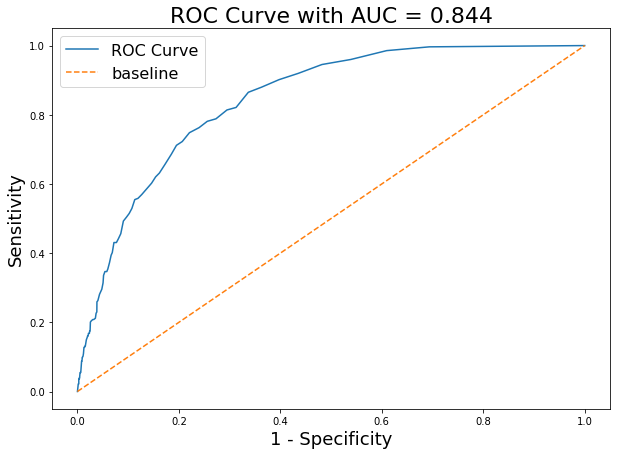

In [25]:
# Calculate snsitivity & 1-specificity for each threshold between 0 and 1.

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)  

# Call the function to create trure_positive_rate values
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Call the function to create false_positive_rate values
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot the graph
roc_plot(fpr_values,tpr_values,pred_df)

In [26]:
# Storing the scores of this model for future reference
training_accuracy = [round(lr.score(X_train_sc, y_train),4)]
testing_accuracy = [round(lr.score(X_test_sc, y_test),4)]
specificity_score = [round(specificity,4)]
precision_score = [round(precision,4)]
recall_score = [round(recall,4)]
f1 = [round(f1_score,4)]
roc = [round(roc_score,4)]

### Model 2: Logistic Regression (with GridSearchCV) model

In [27]:
# Instantiate the model
lr_model = LogisticRegression(max_iter = 4000,random_state=42)

In [28]:
# Create the params for gridsearch
pipe_params ={
    'C' : np.logspace(-4, 4, 10),
    'penalty' : ['l1','l2'],
    #To deal with imbalance class
    'class_weight':['balanced']}

In [29]:
%%time

# Grid search the paramaters
gs_lr = GridSearchCV(lr_model, param_grid=pipe_params, cv=5, n_jobs=-1)

# Fit our X_train & y_train to the model
gs_lr.fit(X_train_sc,y_train)

KeyboardInterrupt: 

In [30]:
# Print out the best paramaters
gs_lr.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
print("Accuracy for LogisticRegression (with gridsearch) on training set is: \n{}\n".
      format(gs_lr.score(X_train_sc,y_train)))

print("Accuracy for LogisticRegression (with gridsearch) on testing set is: \n{}\n".
      format(gs_lr.score(X_test_sc,y_test)))

In [ ]:
# Do the predictions
predictions = gs_lr.predict(X_test_sc)

In [ ]:
# Create a dataframe for confusion_matrix
pd.DataFrame(confusion_matrix(y_test,predictions),
            columns=['Predicted no_Wnv','Predicted Wnv'],
            index=['Actual No_Wnv', 'Actual Wnv'])

In [ ]:
# Print the confusion matrix

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

In [ ]:
# Calculate senstivity and specificity for the model
precision = tp/(tp + fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
f1_score = 2*((precision*recall)/(precision+recall))

print("Sensitivity/Recall score for this model is: \n{}\n".format(recall))
print("Precision score for this model is: \n{}\n".format(precision))
print("Specificity score for this model is: \n{}\n".format(specificity))
print("F1_score score for this model is: \n{}".format(f1_score))

In [ ]:
# Display classification report
print(classification_report(y_test, predictions))

In [ ]:
# Generate the probalities of predictions for above model
pred_proba = [i[1] for i in gs_lr.predict_proba(X_test_sc)]

In [ ]:
# Create a dataframe with the true values and probablities
pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

In [ ]:
# Calculate roc score
roc_score = roc_auc_score(pred_df['true_values'], pred_df['pred_probs'])
print("The AUC for model is \n{}".format(roc_score))

In [ ]:
# Calculate snsitivity & 1-specificity for each threshold between 0 and 1.

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)  

# Call the function to create trure_positive_rate values
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Call the function to create false_positive_rate values
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot the graph
roc_plot(fpr_values,tpr_values,pred_df)

In [ ]:
# Storing the scores of this model for future reference
training_accuracy.append(round(gs_lr.score(X_train_sc,y_train),4))
testing_accuracy.append(round(gs_lr.score(X_test_sc,y_test),4))
specificity_score.append(round(specificity,4))
precision_score.append(round(precision,4))
recall_score.append(round(recall,4))
f1.append(round(f1_score,4))
roc.append(round(roc_score,4))

In [ ]:
# Printing the features and their coefficients to see which features have the most affect.
feats = pd.Series(abs(gs_lr.best_estimator_.coef_.T.reshape(-1)), index=X.columns)

#Top 10 features with highest coeeficients
feats[abs(feats).sort_values(ascending=False).index].head(10)

In [ ]:
# Plot the top 10 features having most impact on target variable

ax = feats[abs(feats).sort_values(ascending=False).index].head(10).plot(kind='bar', figsize=(12,7), color="c")
ax.set_xticklabels(ax.get_xticklabels(),rotation=50,ha='right');

# Give the title and labels
plt.title("Top 10 impacting features:\nLogisticRegression (GridSearch)",fontsize=20)
plt.xlabel("features",fontsize=15)
plt.ylabel("Coefficients",fontsize=15);

### Model 3: Logistic Regression with PCA (with GridSearchCV) model

In [ ]:
# Instantiate the PCA model
pca = PCA(random_state=42,n_components=50)

In [ ]:

# Fit the model
pca.fit(X_train_sc)

# Transform the data
X_train_pca = pca.transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

In [ ]:
# Instantiate the model
lr_model_pca = LogisticRegression(max_iter = 4000)

In [ ]:
# Create the params for gridsearch
pipe_params ={
    'C' : np.logspace(-4, 4, 10),
    'penalty' : ['l1','l2'],
    #To deal with imbalance class
    'class_weight':['balanced']}

In [ ]:
%%time

# Grid search the paramaters
gs_lr_pca = GridSearchCV(lr_model_pca, param_grid=pipe_params, cv=5, n_jobs=-1)

# Fit our X_train & y_train to the model
gs_lr_pca.fit(X_train_pca,y_train)

In [ ]:
# Print out the best paramaters
gs_lr_pca.best_params_

In [ ]:
# Print out the best score
gs_lr_pca.best_score_

In [ ]:
print("Accuracy for LogisticRegression with pca (with gridsearch) on training set is: \n{}\n".
      format(gs_lr_pca.score(X_train_pca,y_train)))

print("Accuracy for LogisticRegression with pca (with gridsearch) on testing set is: \n{}\n".
      format(gs_lr_pca.score(X_test_pca,y_test)))

In [ ]:
# Do the predictions
predictions = gs_lr_pca.predict(X_test_pca)

In [ ]:
# Create a dataframe for confusion_matrix
pd.DataFrame(confusion_matrix(y_test,predictions),
            columns=['Predicted no_Wnv','Predicted Wnv'],
            index=['Actual No_Wnv', 'Actual Wnv'])

In [ ]:
# Print the confusion matrix

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

In [ ]:
# Calculate senstivity and specificity for the model
precision = tp/(tp + fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
f1_score = 2*((precision*recall)/(precision+recall))

print("Sensitivity/Recall score for this model is: \n{}\n".format(recall))
print("Precision score for this model is: \n{}\n".format(precision))
print("Specificity score for this model is: \n{}\n".format(specificity))
print("F1_score score for this model is: \n{}".format(f1_score))

In [ ]:
# Display classification report
print(classification_report(y_test, predictions))

In [ ]:
# Generate the probalities of predictions for above model
pred_proba = [i[1] for i in gs_lr_pca.predict_proba(X_test_pca)]

In [ ]:
# Create a dataframe with the true values and probablities
pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

In [ ]:
# Calculate roc score
roc_score = roc_auc_score(pred_df['true_values'], pred_df['pred_probs'])
print("The AUC for model is \n{}".format(roc_score))

In [ ]:
# Calculate snsitivity & 1-specificity for each threshold between 0 and 1.

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)  

# Call the function to create trure_positive_rate values
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Call the function to create false_positive_rate values
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot the graph
roc_plot(fpr_values,tpr_values,pred_df)

In [ ]:
# Top 10 features
feats = pd.Series(abs(gs_lr_pca.best_estimator_.coef_.T.reshape(-1)))
feats[abs(feats).sort_values(ascending=False).index].head()

In [ ]:
# Printing the features and their coefficients to see which features have the most affect.
feats = pd.Series(data=pca.components_[0], index=X.columns)

#Top 10 features with highest coeeficients
abs(feats[abs(feats).sort_values(ascending=False).index]).head(10)

In [ ]:
# Plot the top 10 features having most impact on target variable

ax = abs(feats[abs(feats).sort_values(ascending=False).index]).head(10).plot(kind='bar', figsize=(12,7), color="c")
ax.set_xticklabels(ax.get_xticklabels(),rotation=50,ha='right');

# Give the title and labels
plt.title("Top 10 impacting features:\nLogisticRegression-PCA (GridSearch)",fontsize=20)
plt.xlabel("features",fontsize=15)
plt.ylabel("Coefficients",fontsize=15);

In [ ]:
# Storing the scores of this model for future reference
training_accuracy.append(round(gs_lr_pca.score(X_train_pca,y_train),4))
testing_accuracy.append(round(gs_lr_pca.score(X_test_pca,y_test),4))
specificity_score.append(round(specificity,4))
precision_score.append(round(precision,4))
recall_score.append(round(recall,4))
f1.append(round(f1_score,4))
roc.append(round(roc_score,4))

### Model 4: Random Forest (with GridSearchCV) model

In [ ]:
# Instantiate the model
rf = RandomForestClassifier(random_state=42)

In [ ]:
# Do a quick accuracy check
cross_val_score(rf,X_train_sc,y_train,cv=3).mean()

In [ ]:
# Create the param list for grid search

rf_params = {
    'class_weight': ['balanced'],
    'n_estimators' : [10,20],
    'max_depth' : [4,5],
    'min_samples_leaf': [3,4],
    'min_samples_split': [4,5]
}

In [ ]:
%%time

# Do the grid search
gs_rf = GridSearchCV(rf,param_grid=rf_params,cv=5,n_jobs=-1)
gs_rf.fit(X_train_sc, y_train)

In [ ]:
print("The best score is: \n{}".format(gs_rf.best_score_))
print("\nThe best params are: \n{}".format(gs_rf.best_params_))

In [ ]:
print("Accuracy for Random Forest (with gridsearch) on training set is: \n{}\n".
      format(gs_rf.score(X_train_sc, y_train)))

print("Accuracy for Random Forest (with gridsearch) on testing set is: \n{}\n".
      format(gs_rf.score(X_test_sc, y_test)))

In [ ]:
# Do the predictions
predictions = gs_rf.predict(X_test_sc)

In [ ]:
# Create a dataframe for confusion matrix
pd.DataFrame(confusion_matrix(y_test,predictions),
            columns=['Predicted no_Wnv','Predicted Wnv'],
            index=['Actual No_Wnv', 'Actual Wnv'])

In [ ]:
# Print the confusion matrix

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

In [ ]:
# Calculate senstivity and specificity for the model
precision = tp/(tp + fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
f1_score = 2*((precision*recall)/(precision+recall))

print("Sensitivity/Recall score for this model is: \n{}\n".format(recall))
print("Precision score for this model is: \n{}\n".format(precision))
print("Specificity score for this model is: \n{}\n".format(specificity))
print("F1_score score for this model is: \n{}".format(f1_score))

In [ ]:
print(classification_report(y_test, predictions))

In [ ]:
# Generate the probalities of predictions for above model
pred_proba = [i[1] for i in gs_rf.predict_proba(X_test_sc)]

# Create a dataframe with the true values and probablities
pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

# Calculate roc score
roc_score = roc_auc_score(pred_df['true_values'], pred_df['pred_probs'])
print("The AUC for model is \n{}".format(roc_score))

In [ ]:
# Calculate snsitivity & 1-specificity for each threshold between 0 and 1.

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)  

# Call the function to create trure_positive_rate values
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Call the function to create false_positive_rate values
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot the graph
roc_plot(fpr_values,tpr_values,pred_df)

In [ ]:
# Printing the features and their coefficients to see which features have the most affect.
feats = pd.Series(gs_rf.best_estimator_.feature_importances_, index=X.columns).sort_values(ascending=False)

#Top 10 features with highest coeeficients
feats[abs(feats).sort_values(ascending=False).index].head(10)

In [ ]:
# Plot the top 10 features having most impact on target variable

ax = feats[abs(feats).sort_values(ascending=False).index].head(10).plot(kind='bar', figsize=(12,7), color="c")
ax.set_xticklabels(ax.get_xticklabels(),rotation=50,ha='right');

# Give the title and labels
plt.title("Top 10 impacting features:\nRandom Forest (GridSearch)",fontsize=20)
plt.xlabel("features",fontsize=15)
plt.ylabel("Coefficients",fontsize=15);

In [ ]:
# Storing the scores of this model for future reference
training_accuracy.append(round(gs_rf.score(X_train_sc,y_train),4))
testing_accuracy.append(round(gs_rf.score(X_test_sc,y_test),4))
specificity_score.append(round(specificity,4))
precision_score.append(round(precision,4))
recall_score.append(round(recall,4))
f1.append(round(f1_score,4))
roc.append(round(roc_score,4))

### Model 5: XgBoost (with GridSearchCV)

In [ ]:
#Instantiate the model
xgb = XGBClassifier(random_state=42)

In [ ]:
# Create the grid-search parameters
parameters = { 'scale_pos_weight':[1, 2, 3],
              'max_depth':[5],
             }

In [ ]:
%%time

# Gridsearch for best result
gs_xgb = GridSearchCV(xgb, param_grid=parameters, cv=5,n_jobs=-1)

# Fit the model on optimized params
gs_xgb.fit(X_train_sc, y_train)

In [ ]:
print("The best params for gridsearch are: \n{}".format(gs_xgb.best_params_))
print("\nThe best score for gridsearch are: \n{}".format(gs_xgb.best_score_))

In [ ]:
print("The accuracy for XGB model (with gridsearch) for training set is: \n{}".
      format(gs_xgb.score(X_train_sc,y_train)))

print("\nThe accuracy for XGB model (with gridsearch) for testing set is: \n{}".
      format(gs_xgb.score(X_test_sc,y_test)))

In [ ]:
# Do the predictions
predictions = gs_xgb.predict(X_test_sc)

In [ ]:
# Create a dataframe for confusion matrix
pd.DataFrame(confusion_matrix(y_test,predictions),
            columns=['Predicted no_Wnv','Predicted Wnv'],
            index=['Actual No_Wnv', 'Actual Wnv'])

In [ ]:
# Print the confusion matrix

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

In [ ]:
# Calculate senstivity and specificity for the model
precision = tp/(tp + fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
f1_score = 2*((precision*recall)/(precision+recall))

print("Sensitivity/Recall score for this model is: \n{}\n".format(recall))
print("Precision score for this model is: \n{}\n".format(precision))
print("Specificity score for this model is: \n{}\n".format(specificity))
print("F1_score score for this model is: \n{}".format(f1_score))

In [ ]:
print(classification_report(y_test, predictions))

In [ ]:
# Generate the probalities of predictions for above model
pred_proba = [i[1] for i in gs_xgb.predict_proba(X_test_sc)]

# Create a dataframe with the true values and probablities
pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

# Calculate roc score
roc_score = roc_auc_score(pred_df['true_values'], pred_df['pred_probs'])
print("The AUC for model is \n{}".format(roc_score))

In [ ]:
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)  

# Call the function to create trure_positive_rate values
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Call the function to create false_positive_rate values
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot the graph
roc_plot(fpr_values,tpr_values,pred_df)

In [ ]:
# Printing the features and their coefficients to see which features have the most affect.
feats = pd.Series(gs_xgb.best_estimator_.feature_importances_, index=X.columns).sort_values(ascending=False)

#Top 10 features with highest coeeficients
feats[abs(feats).sort_values(ascending=False).index].head(10)

In [ ]:
# Plot the top 10 features having most impact on target variable

ax = feats[abs(feats).sort_values(ascending=False).index].head(10).plot(kind='bar', figsize=(12,7), color="c")
ax.set_xticklabels(ax.get_xticklabels(),rotation=50,ha='right');

# Give the title and labels
plt.title("Top 10 impacting features:\nXGBoost (GridSearch)",fontsize=20)
plt.xlabel("features",fontsize=15)
plt.ylabel("Coefficients",fontsize=15);

In [ ]:
# Storing the scores of this model for future reference
training_accuracy.append(round(gs_rf.score(X_train_sc,y_train),4))
testing_accuracy.append(round(gs_rf.score(X_test_sc,y_test),4))
specificity_score.append(round(specificity,4))
precision_score.append(round(precision,4))
recall_score.append(round(recall,4))
f1.append(round(f1_score,4))
roc.append(round(roc_score,4))

In [ ]:
# Create a dataframe for scores and metrics from all models

final_scores = pd.DataFrame({'train_acc':training_accuracy,
                             'test_acc':testing_accuracy,
                             'specificity':specificity_score,
                             'precision':precision_score,
                             'recall_sensitivity': recall_score,
                             'f1_score':f1,
                             'roc_score': roc
                            },
                           index=['lr', 'gs_lr', 'gs_lr_pca', 'gs_rf', 'gs_xgboost'])

In [ ]:
# save the file
final_scores.to_csv('../results/final_scores.csv')

### Now, we will train the whole the selected model on whole training set and do predictions on the test set.

In [ ]:
# Create list of columns without Id for testing set
columns = [col for col in test_split.columns if col!='Id']

In [ ]:
# Final X_train
X_train_final = train_split[features]

# Final y_train
y_train_final  = train_split['WnvPresent']

# Final X_test
X_test_final = test_split[columns]

In [ ]:
#Instantiate a StandardScaler object
ss1 = StandardScaler()

#Fit & transform the X_train_final data into StandardScaler object
X_train_final_ss = ss1.fit_transform(X_train_final)

#Apply the fit method to X_test_final
X_test_final_ss = ss1.transform(X_test_final)

### Fit the training data and predict for "test" : LogisticRegression (with gridsearch)

In [ ]:
# Fit the model
gs_lr.fit(X_train_final,y_train_final)

# Do the predictions
predictions_gs_lr = gs_lr.predict(X_test_final)

# Create dataframe for scores
predict_gs_lr = pd.DataFrame(test_split['Id'])
predict_gs_lr['WnvPresent'] = predictions_gs_lr

# Change the type to int
predict_gs_lr = predict_gs_lr.astype('int')

# Store the file
predict_gs_lr.to_csv('../results/predict_gs_lr.csv',index=False)

### Fit the training data and predict for "test" data : RandomForest (with gridsearch)

In [ ]:
# Fit the model
gs_rf.fit(X_train_final,y_train_final)

# Do the predictions
predictions_gs_rf = gs_rf.predict(X_test_final)

# Create dataframe for scores
pred_gs_rf = pd.DataFrame(test_split['Id'])
pred_gs_rf['WnvPresent'] = predictions_gs_rf

# Change the type to int
pred_gs_rf = pred_gs_rf.astype('int')

# Store the file
pred_gs_rf.to_csv('../results/pred_gs_rf.csv',index=False)

## Model Comparison

In [ ]:
# Print the scores
scores = pd.read_csv('../results/final_scores_1.csv',index_col=0)
scores

From above we can see that, the best performing models are:
1. Logistic Regression (with GridSearch)
2. Random Forest (with GridSearch)

We selected Random Forest as our final model:
- it has higher recall score
- ROC score is high
- Random forest perform well with imbalanced classes
- reduces variance

#### Kaggle score


![](./data/Project4_kaggle_score.png)

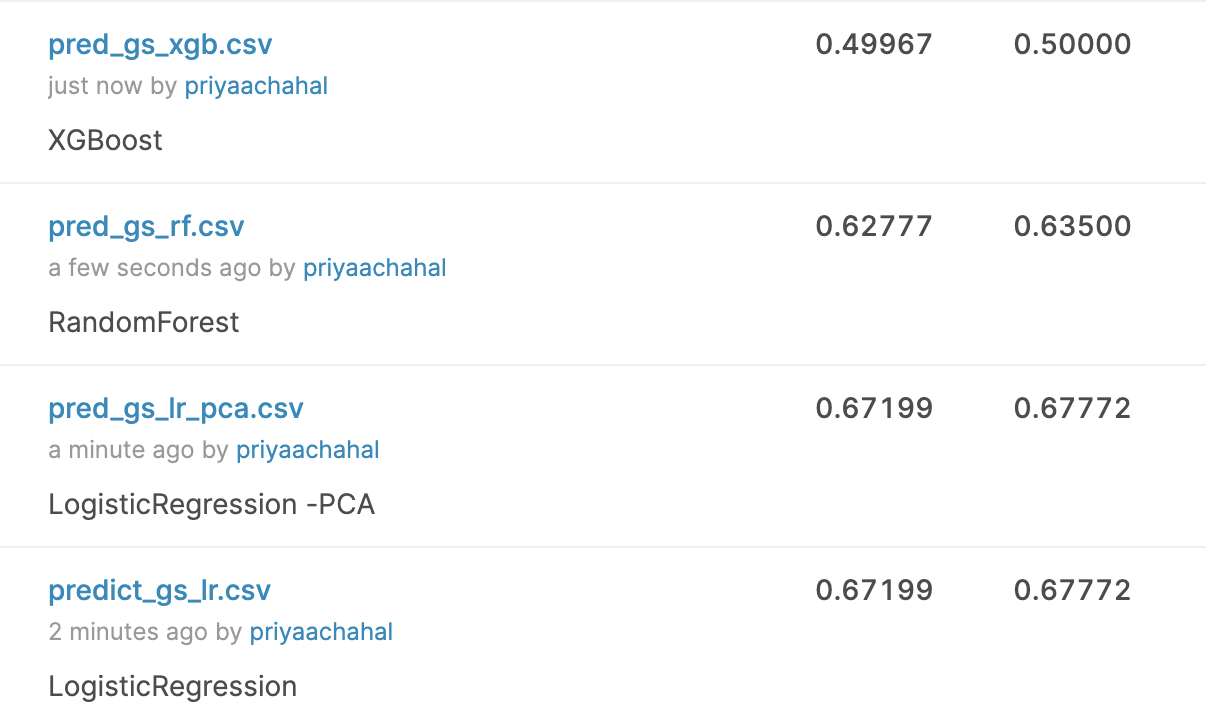